In [123]:
import requests
import zipfile
import gzip
import shutil
import os

# Function to download and save a file from a URL
def download_file(url, dest_path):
    response = requests.get(url, stream=True)
    with open(dest_path, "wb") as file:
        shutil.copyfileobj(response.raw, file)
    del response

# URLs of the datasets
movielens_url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
imdb_urls = {
    "title.basics.tsv.gz": "https://datasets.imdbws.com/title.basics.tsv.gz",
    "name.basics.tsv.gz": "https://datasets.imdbws.com/name.basics.tsv.gz",
}

# Download and extract MovieLens dataset
download_file(movielens_url, "ml-1m.zip")
with zipfile.ZipFile("ml-1m.zip", "r") as zip_ref:
    zip_ref.extractall()

# Download IMDb datasets
for filename, url in imdb_urls.items():
    download_file(url, filename)


print("All datasets downloaded and extracted successfully.")


All datasets downloaded and extracted successfully.


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
import pandas as pd
import numpy as np
import gzip

# Load MovieLens dataset
movies = pd.read_csv('/kaggle/working/ml-1m/movies.dat', sep='::', encoding='ISO-8859-1',header=None, engine='python', names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_csv('/kaggle/working/ml-1m/ratings.dat', sep='::', encoding='ISO-8859-1',header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Load IMDb datasets
def load_tsv_gz(filepath):
    with gzip.open(filepath, 'rt') as f:
        return pd.read_csv(f, sep='\t')

imdb_basics =  load_tsv_gz('/kaggle/working/title.basics.tsv.gz')
imdb_names =  load_tsv_gz('/kaggle/working/name.basics.tsv.gz')


/tmp/ipykernel_1097/2641934633.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f, sep='\t')


In [126]:
n_ratings = len(ratings)
n_movies = ratings['MovieID'].nunique()
n_users = ratings['UserID'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 1000209
Number of unique movieId's: 3706
Number of unique users: 6040
Average number of ratings per user: 165.6
Average number of ratings per movie: 269.89


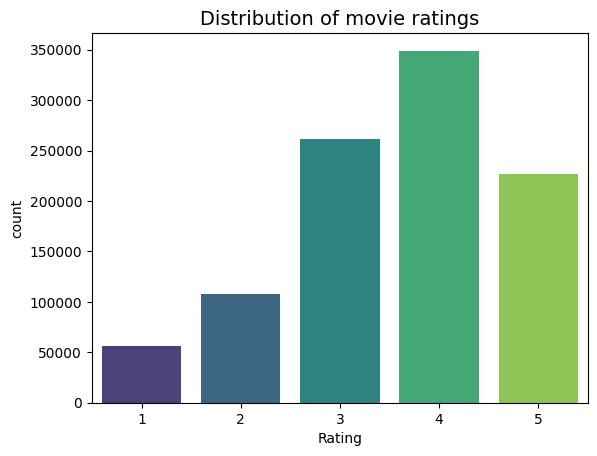

In [127]:
sns.countplot(x="Rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [128]:
# Extract year from MovieLens titles
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)')
movies['Title'] = movies['Title'].str.replace(r'\s+\(\d{4}\)$', '', regex=True)
print(movies.head())


   MovieID                        Title                        Genres  Year
0        1                    Toy Story   Animation|Children's|Comedy  1995
1        2                      Jumanji  Adventure|Children's|Fantasy  1995
2        3             Grumpier Old Men                Comedy|Romance  1995
3        4            Waiting to Exhale                  Comedy|Drama  1995
4        5  Father of the Bride Part II                        Comedy  1995


In [129]:
movies['Genres'] = movies['Genres'].str.split('|')


In [130]:
movies

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
3878,3948,Meet the Parents,[Comedy],2000
3879,3949,Requiem for a Dream,[Drama],2000
3880,3950,Tigerland,[Drama],2000
3881,3951,Two Family House,[Drama],2000


In [131]:
# Filter IMDb basics to include only movies
imdb_basics = imdb_basics[imdb_basics['titleType'] == 'movie']
imdb_basics = imdb_basics[['tconst', 'primaryTitle', 'startYear', 'genres']]
imdb_basics['startYear'] = pd.to_numeric(imdb_basics['startYear'], errors='coerce')


In [132]:
movies['Year'] = pd.to_numeric(movies['Year'], errors='coerce').astype('Int64')
imdb_basics['startYear'] = pd.to_numeric(imdb_basics['startYear'], errors='coerce').astype('Int64')


In [133]:
# Merge on title and year
merged_df = pd.merge(movies, imdb_basics, left_on=['Title', 'Year'], right_on=['primaryTitle', 'startYear'], how='inner')

# Merge ratings
merged_df = pd.merge(merged_df, ratings, on='MovieID', how='inner')

# Display the merged dataframe
print(merged_df.head())


   MovieID      Title                           Genres  Year     tconst  \
0        1  Toy Story  [Animation, Children's, Comedy]  1995  tt0114709   
1        1  Toy Story  [Animation, Children's, Comedy]  1995  tt0114709   
2        1  Toy Story  [Animation, Children's, Comedy]  1995  tt0114709   
3        1  Toy Story  [Animation, Children's, Comedy]  1995  tt0114709   
4        1  Toy Story  [Animation, Children's, Comedy]  1995  tt0114709   

  primaryTitle  startYear                      genres  UserID  Rating  \
0    Toy Story       1995  Adventure,Animation,Comedy       1       5   
1    Toy Story       1995  Adventure,Animation,Comedy       6       4   
2    Toy Story       1995  Adventure,Animation,Comedy       8       4   
3    Toy Story       1995  Adventure,Animation,Comedy       9       5   
4    Toy Story       1995  Adventure,Animation,Comedy      10       5   

   Timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474  


In [134]:
merged_df = merged_df.drop("genres", axis='columns')
merged_df = merged_df.drop("primaryTitle", axis='columns')

In [135]:
merged_df

,MovieID,Title,Genres,Year,tconst,startYear,UserID,Rating,Timestamp
0,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,1,5,978824268
1,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,6,4,978237008
2,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,8,4,978233496
3,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,9,5,978225952
4,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,10,5,978226474
...,...,...,...,...,...,...,...,...,...
695436,3951,Two Family House,[Drama],2000,tt0202641,2000,3940,4,1018864931
695437,3951,Two Family House,[Drama],2000,tt0202641,2000,3985,3,975725619
695438,3951,Two Family House,[Drama],2000,tt0202641,2000,4025,5,975211878
695439,3951,Two Family House,[Drama],2000,tt0202641,2000,4727,3,996895653


In [136]:
from collections import Counter

genre_frequency = Counter(g for genres in merged_df['Genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 18 genres.


Counter({'Comedy': 263364,
         'Drama': 243217,
         'Action': 181445,
         'Thriller': 125644,
         'Sci-Fi': 116247,
         'Romance': 109664,
         'Adventure': 98682,
         'Crime': 52633,
         'Horror': 48868,
         'War': 48660,
         "Children's": 45055,
         'Mystery': 28662,
         'Musical': 26920,
         'Fantasy': 25575,
         'Animation': 24306,
         'Western': 16604,
         'Film-Noir': 12340,
         'Documentary': 5002})

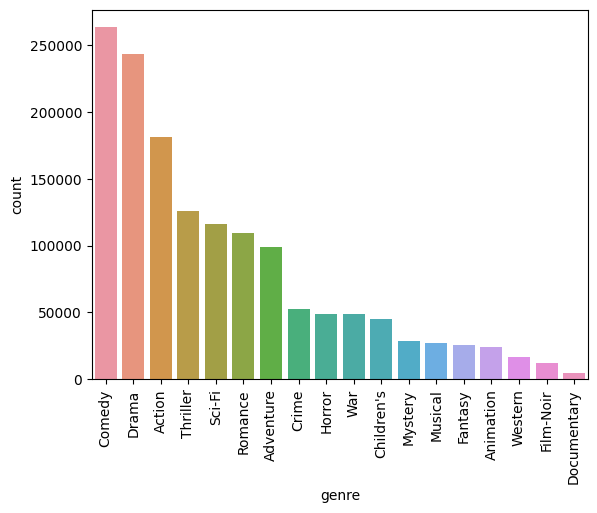

In [137]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [150]:
genres = set(g for G in movies['Genres'] for g in G)
movies_cop = movies.copy()
for g in genres:
    movies_cop[g] = movies_cop['Genres'].transform(lambda x: int(g in x))
    
movie_genre = movies_cop.drop(columns=['MovieID', 'Title','Genres','Year'])

In [151]:
movie_genre

,Horror,Mystery,Animation,Crime,Romance,Musical,Adventure,Thriller,Children's,Film-Noir,Sci-Fi,Drama,War,Western,Action,Comedy,Documentary,Fantasy
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3879,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [153]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['Title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

In [154]:
title = movie_finder('Jumanji')
title


'Jumanji'

In [162]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [163]:
merged_df

,MovieID,Title,Genres,Year,tconst,startYear,UserID,Rating,Timestamp
0,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,1,5,978824268
1,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,6,4,978237008
2,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,8,4,978233496
3,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,9,5,978225952
4,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,10,5,978226474
...,...,...,...,...,...,...,...,...,...
695436,3951,Two Family House,[Drama],2000,tt0202641,2000,3940,4,1018864931
695437,3951,Two Family House,[Drama],2000,tt0202641,2000,3985,3,975725619
695438,3951,Two Family House,[Drama],2000,tt0202641,2000,4025,5,975211878
695439,3951,Two Family House,[Drama],2000,tt0202641,2000,4727,3,996895653


In [183]:
temp_df = merged_df.drop_duplicates(subset='MovieID', keep="last")
movie_features = temp_df.set_index('MovieID').drop(columns=['Title', 'tconst','Rating', 'UserID','startYear'])
movie_features

,Genres,Year,Timestamp
MovieID,,,
1,"[Animation, Children's, Comedy]",1995,957717358
2,"[Adventure, Children's, Fantasy]",1995,956719238
3,"[Comedy, Romance]",1995,956713372
4,"[Comedy, Drama]",1995,956753920
5,[Comedy],1995,956713165
...,...,...,...
3947,[Thriller],1971,1004811080
3948,[Comedy],2000,972309420
3949,[Drama],2000,1001780975


In [166]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [203]:
merged_df

,MovieID,Title,Genres,Year,tconst,startYear,UserID,Rating,Timestamp
0,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,1,5,978824268
1,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,6,4,978237008
2,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,8,4,978233496
3,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,9,5,978225952
4,1,Toy Story,"[Animation, Children's, Comedy]",1995,tt0114709,1995,10,5,978226474
...,...,...,...,...,...,...,...,...,...
695436,3951,Two Family House,[Drama],2000,tt0202641,2000,3940,4,1018864931
695437,3951,Two Family House,[Drama],2000,tt0202641,2000,3985,3,975725619
695438,3951,Two Family House,[Drama],2000,tt0202641,2000,4025,5,975211878
695439,3951,Two Family House,[Drama],2000,tt0202641,2000,4727,3,996895653


In [174]:
tmp_df = merged_df.drop(columns=['Title','startYear', 'Genres','Timestamp', 'tconst', 'Year']).drop_duplicates()
tmp_df

,MovieID,UserID,Rating
0,1,1,5
1,1,6,4
2,1,8,4
3,1,9,5
4,1,10,5
...,...,...,...
695436,3951,3940,4
695437,3951,3985,3
695438,3951,4025,5
695439,3951,4727,3


In [205]:
!pip install LightFM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LightFM: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=464713 sha256=94c23a2d7d2f304b945090471f9b0d1afe6a07e78f0a0a3fd82f7781d074451f
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built LightFM


In [233]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset as LightFMDataset
from lightfm.evaluation import precision_at_k

# Create a LightFM dataset
dataset = LightFMDataset()
genres = set(g for G in movies['Genres'] for g in G)
for g in genres:
    merged_df[g] = merged_df['Genres'].transform(lambda x: int(g in x))
df_features = genres.union(merged_df['Year'].astype(str).unique())

In [234]:
dataset.fit(users=merged_df['UserID'].unique(),
            items=merged_df['MovieID'].unique(),
            item_features=df_features)

In [235]:
# Build the interactions and item features matrix
(interactions, weights) = dataset.build_interactions([(x['UserID'], x['MovieID']) for _, x in merged_df.iterrows()])
item_features = dataset.build_item_features(
    [(x['MovieID'], [genre for genre in genres if x[genre]] + [str(x['Year'])]) for _, x in merged_df.drop_duplicates(subset='MovieID', keep="last").iterrows()]
)


# Train the model
model = LightFM(loss='warp')
model.fit(interactions, item_features=item_features, epochs=80, num_threads=2,verbose=True)



Epoch: 100%|██████████| 80/80 [01:01<00:00,  1.29it/s]


In [239]:
# Define the couple of users
def findCoupleMovie(user1, user2):

    # Predict scores for all items for both users
    def get_item_scores(user_id, model, interactions, item_features):
        scores = model.predict(user_id, np.arange(interactions.shape[1]), item_features=item_features)
        return scores

    user1_scores = get_item_scores(user1, model, interactions, item_features)
    user2_scores = get_item_scores(user2, model, interactions, item_features)

    # Calculate the couple score
    couple_scores = (user1_scores + user2_scores) / 2

    # Get the movie IDs in the order they appear in the interaction matrix
    movie_id_map = {v: k for k, v in dataset.mapping()[2].items()}

    # Get the movie IDs sorted by the couple score
    sorted_indices = np.argsort(-couple_scores)
    suggested_movie_id = movie_id_map[sorted_indices[0]]
    suggested_movie = movies[movies['MovieID'] == suggested_movie_id]['Title'].values[0]
    print(f"Suggested movie for the couple: {suggested_movie}")

    # Evaluate the model
    train_precision = precision_at_k(model, interactions, item_features=item_features, k=10).mean()
    print(f'Precision: {train_precision}')

In [241]:
findCoupleMovie(1, 2)

Suggested movie for the couple: Apollo 13
Precision: 0.6833609342575073
